# Lab4 10/18/23

## Methods
* instance, class and static methods
* https://wiki.python.org/moin/Decorators
* https://hackthedeveloper.com/python-classmethod/

In [27]:
class MyClass:

    # regular instance method:
    # instance specific method
    # self - the object instance as argument 
    def my_method(self):
        pass

    # class method:
    # cls - the class as argument
    @classmethod
    def my_class_method(cls):
        pass

    # static method:
    # just any function you would define outside of class
    # can be defined within class to group it with the class for readability/logical connection etc
    @staticmethod
    def my_static_method():
        pass

## classmethod
* Access or modify class-specific data
* Provide alternative constructors

In [3]:
class Car:
    # Class variable
    num_wheels = 4

    @classmethod
    def get_num_wheels(cls):
        return cls.num_wheels

    @classmethod
    def set_num_wheels(cls, num):
        cls.num_wheels = num

# Accessing class variables using a classmethod
print(Car.get_num_wheels())  # Output: 4

# Modifying class variables using a classmethod
Car.set_num_wheels(6)
print(Car.get_num_wheels())  # Output: 6

4
6


In [5]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    @classmethod
    def from_tuple(cls, coordinates):
        x, y = coordinates
        return cls(x, y)

    

# Using the alternative constructor
coordinates = (5, 10)
point = Point.from_tuple(coordinates) # an instance
print(point.x)
print(point.y)

5
10


In [6]:
import numpy as np

class Circle:
    def __init__(self, radius):
        self.radius = radius

    @classmethod
    def from_diameter(cls, diameter):
        radius = diameter / 2
        return cls(radius)

    @classmethod
    def from_area(cls, area):
        radius = (area / np.pi) ** 0.5
        return cls(radius)

# Using alternative constructors
circle1 = Circle(5)
circle2 = Circle.from_diameter(10)
circle3 = Circle.from_area(78.54)

## staticmethod and classmethod
* Encapsulate related functionalities
* Organize related functionalities
* Improves readability and transferability of the code

In [18]:
class FileUtils:
    FILE_EXTENSION = ".txt"

    @classmethod
    def add_extension(cls, filename):
        return filename + cls.FILE_EXTENSION

    @classmethod
    def remove_extension(cls, filename):
        if filename.endswith(cls.FILE_EXTENSION): #string specific method to check the suffix
            return filename[:-len(cls.FILE_EXTENSION)]
        return filename

# Using classmethods for file operations
filename = "data"
filename_with_extension = FileUtils.add_extension(filename)
filename_without_extension = FileUtils.remove_extension(filename_with_extension)

print(filename_with_extension)
print(filename_without_extension)

data.txt
data


## Class Example
* Convert Functions to Classes

In [19]:
import timeit

class MySorted:

    def __init__(self):

        self.bubble_time = 0 #time taken for sorting
        self.bubble_ncomp = 0

    def bubble_sorted(self, a_list):

        start_time = timeit.default_timer()

        for i in range(len(a_list)): 
            for j in range(i+1,len(a_list)):
                self.bubble_ncomp += 1
                if a_list[i]>a_list[j]:       
                    a_list[i], a_list[j] = a_list[j], a_list[i]

        self.bubble_time = timeit.default_timer() - start_time

        return a_list

    def merge_sorted(self, a_list, key=None, reverse=None):

        nComp = 0

        def mergeSort(a_list, key=key, reverse=reverse, nComp=0):

            if key is None:
                key = lambda x: x

            if reverse:
                cmp = lambda x,y: key(x) < key(y)
            else:
                cmp = lambda x,y: key(x) > key(y)

            if len(a_list) > 1:
                mid = len(a_list) // 2
                left_half = a_list[:mid]
                right_half = a_list[mid:]

                left_half, nComp_l = mergeSort(left_half,key=key,reverse=reverse,nComp=nComp)
                right_half,nComp_r = mergeSort(right_half,key=key,reverse=reverse,nComp=nComp)

                nComp = nComp + nComp_l + nComp_r

                i = 0
                j = 0
                k = 0

                while i < len(left_half) and j < len(right_half):
                    nComp += 1
                    if cmp(left_half[i], right_half[j]): 

                        #if reverse and this returns True, right_half is greater and append right_half
                        #if not reverse and this returns True, left_half is greater and append right_half
                        
                        a_list[k] = right_half[j]
                        j = j + 1
                    
                    else:
                        
                        a_list[k] = left_half[i]
                        i = i + 1

                    k = k + 1

                # in case len(left_half) != len(right_half)

                while i < len(left_half):

                    a_list[k] = left_half[i]
                    i = i + 1
                    k = k + 1

                while j < len(right_half):

                    a_list[k] = right_half[j]
                    j = j + 1
                    k = k + 1

            return a_list, nComp

        start_time = timeit.default_timer()
        a_list, nComp = mergeSort(a_list,key=key,reverse=reverse, nComp=nComp)
        self.merge_time = timeit.default_timer() - start_time

        return a_list, nComp

In [20]:
import random

bubble_ncomp = []

list_size = [10, 100, 1000, 10000]

for size in list_size:
    
    rand_list = random.sample(range(-size, size), size)
    
    sorted_f = MySorted() # Create instances - ncomp is an instance specific variable

    sorted_f.bubble_sorted(rand_list)
    
    bubble_ncomp.append(sorted_f.bubble_ncomp)

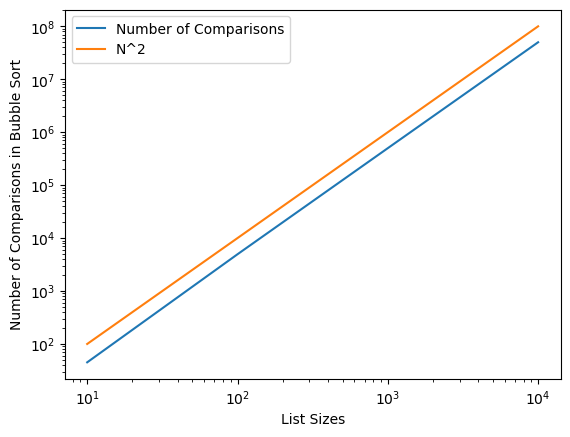

In [21]:
import matplotlib.pyplot as plt

plt.plot(list_size,bubble_ncomp, label = 'Number of Comparisons')
plt.plot(list_size,[i**2 for i in list_size], label = 'N^2')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('List Sizes')
plt.ylabel('Number of Comparisons in Bubble Sort')

plt.legend()

plt.show()

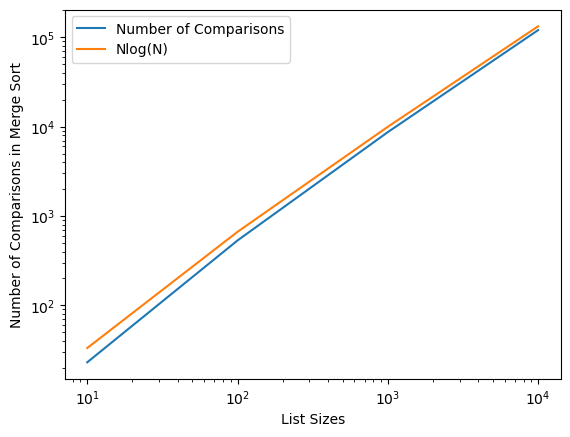

In [22]:
import math
merge_ncomp = []

list_size = [10, 100, 1000, 10000]

sorted_f = MySorted()

for size in list_size:
    
    rand_list = random.sample(range(-size, size), size)

    sorted_lst, ncomp = sorted_f.merge_sorted(rand_list)
    
    merge_ncomp.append(ncomp)

plt.plot(list_size,merge_ncomp, label = 'Number of Comparisons')
plt.plot(list_size,[i*math.log(i)/math.log(2) for i in list_size], label = 'Nlog(N)')

plt.xlabel('List Sizes')
plt.ylabel('Number of Comparisons in Merge Sort')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()